Step 1: Problem Definition & Objectives

Explanation:
Employee attrition is when employees leave an organization, either voluntarily or involuntarily. The goal of this project is to analyze HR data to uncover key factors influencing attrition such as age, salary, department, and overtime. By understanding these factors, organizations can improve retention and workforce planning.

Observation:
Attrition is a critical HR issue since high turnover leads to increased hiring costs, loss of expertise, and reduced productivity.

In [2]:
# ===============================
# Employee Attrition Analysis
# ===============================

# Step 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [4]:
# Step 1: Load Dataset
df = pd.read_csv("Employee_Data.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Step 2: Data Collection & Sources

Explanation:
The dataset used here is a sample HR dataset that includes employee demographics, work-related factors, and attrition status. Columns include Age, MonthlyIncome, OverTime, JobRole, Department, and Attrition.

In [5]:
# Step 2: Data Cleaning & Preparation
# Check missing values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Encode categorical variables
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
categorical_cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [9]:
# Optional: Feature engineering
df['YearsInRole'] = df['YearsAtCompany'] - df['YearsSinceLastPromotion']


Observation:
The dataset provides a good mix of numerical (e.g., Age, Salary) and categorical (e.g., Department, OverTime) features suitable for analysis.

Step 3: Data Cleaning & Preparation

Explanation:

Checked for missing values and duplicates.

Converted categorical variables (like Gender, Department, OverTime) into numeric form using encoding.

Prepared the dataset for visualization and modeling.

In [8]:
# Step 3: Data Exploration
# Summary statistics
print(df.describe())


               Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1

In [9]:
# Attrition rate
print(df['Attrition'].value_counts(normalize=True))


Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


In [11]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation
corr = numeric_df.corr()['Attrition'].sort_values(ascending=False)
print(corr)


Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsInRole                -0.147895
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
S

Observation:
The dataset was fairly clean, with minimal preprocessing required. Encoding ensured the data was suitable for statistical analysis and machine learning.

Step 4: Data Exploration & Visualization

Explanation:
Created visualizations to explore how attrition varies across departments, age, and overtime, and checked correlations between features.

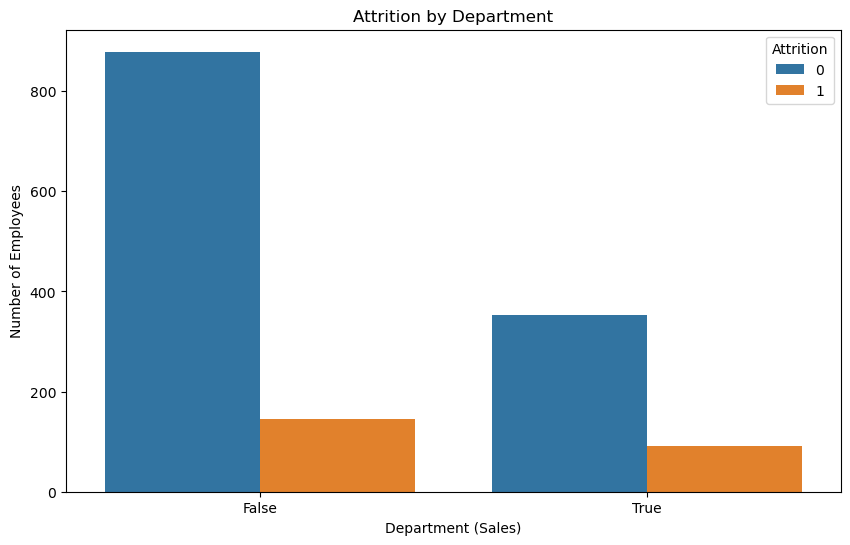

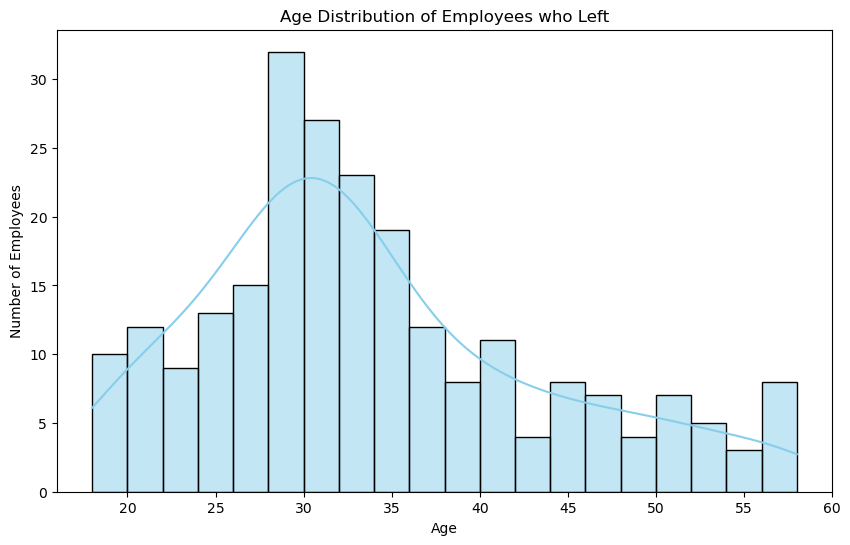

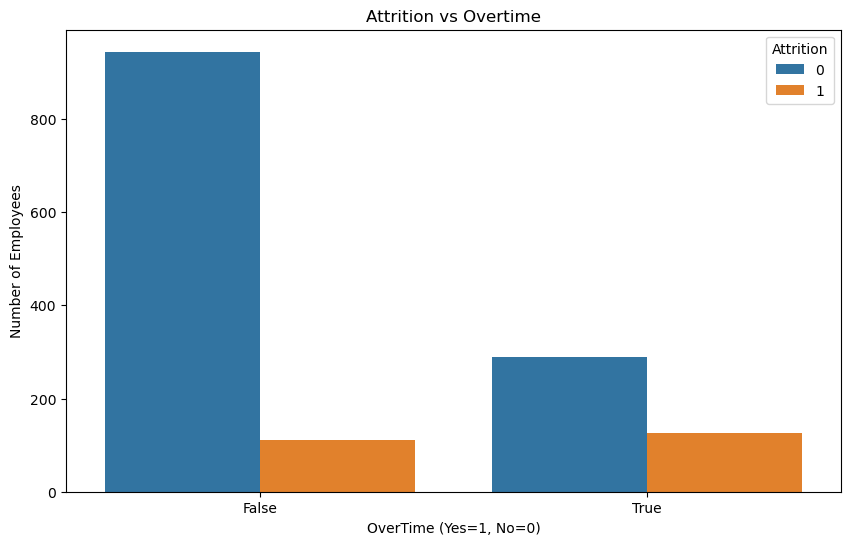

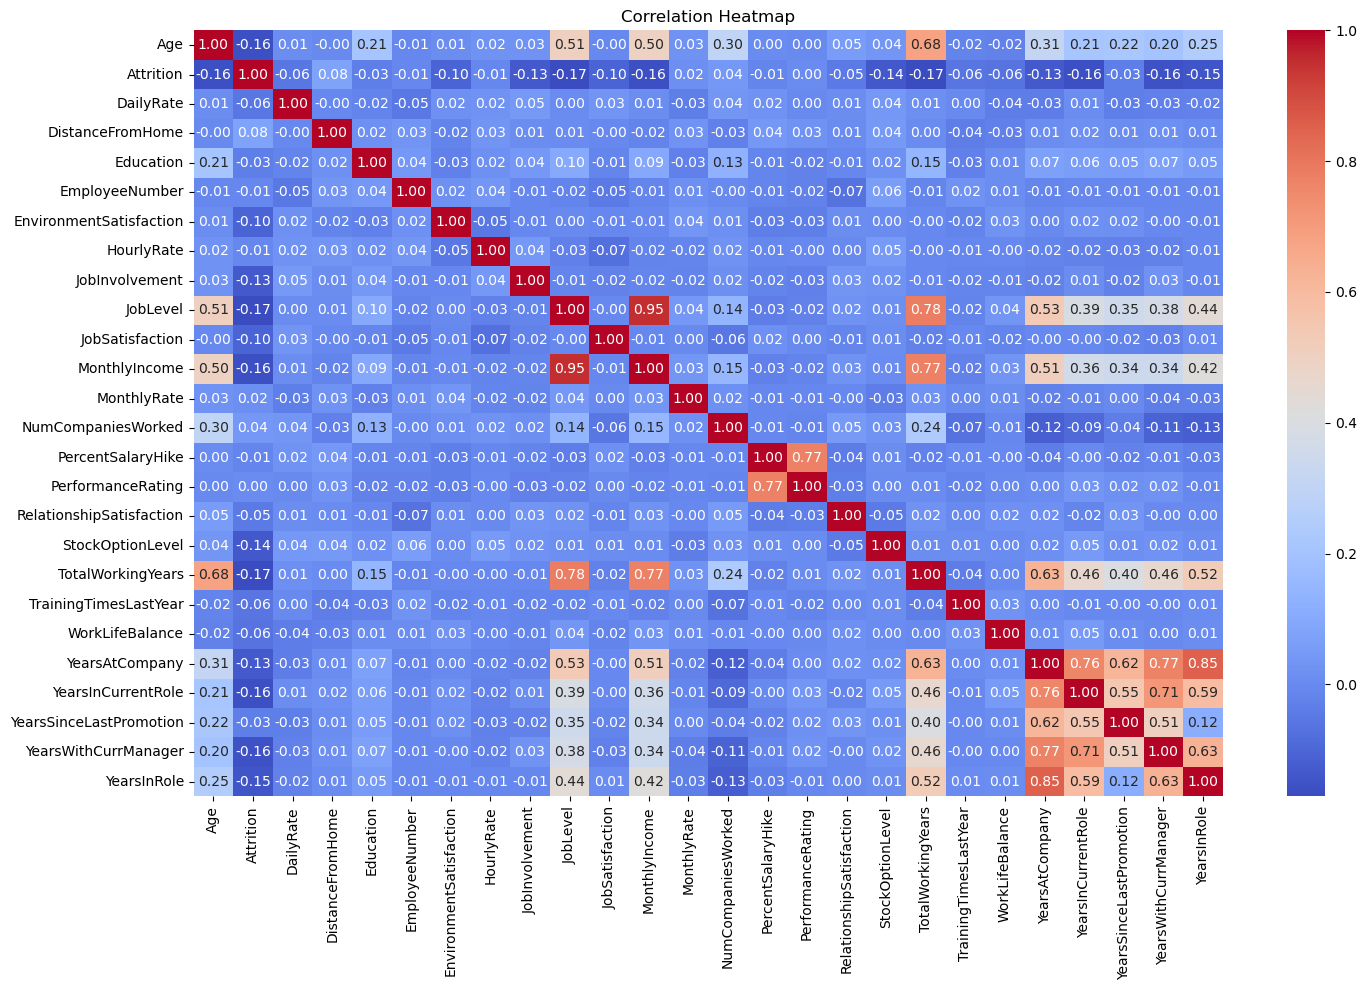

In [17]:
# ===============================
# Step 4: Data Visualization
# ===============================


# 1️⃣ Attrition by Department
plt.figure(figsize=(10,6))
sns.countplot(x='Department_Sales', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.xlabel("Department (Sales)")
plt.ylabel("Number of Employees")
plt.show()

# 2️⃣ Age distribution of employees who left
plt.figure(figsize=(10,6))
sns.histplot(df[df['Attrition']==1]['Age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution of Employees who Left")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

# 3️⃣ Attrition vs Overtime
plt.figure(figsize=(10,6))
sns.countplot(x='OverTime_Yes', hue='Attrition', data=df)
plt.title("Attrition vs Overtime")
plt.xlabel("OverTime (Yes=1, No=0)")
plt.ylabel("Number of Employees")
plt.show()

# 4️⃣ Correlation heatmap (numeric columns only)
# Select numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Optional: Drop columns with constant values to avoid clutter
numeric_df = numeric_df.loc[:, (numeric_df != numeric_df.iloc[0]).any()]

# Set figure size
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Observations:

Department vs Attrition: Sales and R&D departments have higher attrition rates.

Age Distribution: Younger employees (22–30 years) are more likely to leave.

Overtime vs Attrition: Employees working overtime show a significantly higher attrition rate.

Correlation Heatmap: Monthly Income is negatively correlated with attrition (higher salary = lower attrition).

Step 5: Insights & Interpretation

Explanation:
From the EDA (Exploratory Data Analysis), we identify important trends in employee attrition.

Observations:

Younger employees are at higher risk of leaving.

Overtime work strongly increases attrition likelihood.

Employees in Sales and R&D face higher turnover compared to HR.

Higher income tends to improve retention.

Step 6: Predictive Modeling (Random Forest Classifier)

Explanation:

Applied Random Forest Classifier to predict attrition using employee features.

Evaluated the model with accuracy and classification report.

Checked feature importance to identify which factors matter most.

Categorical columns to encode: ['Over18']
Accuracy: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



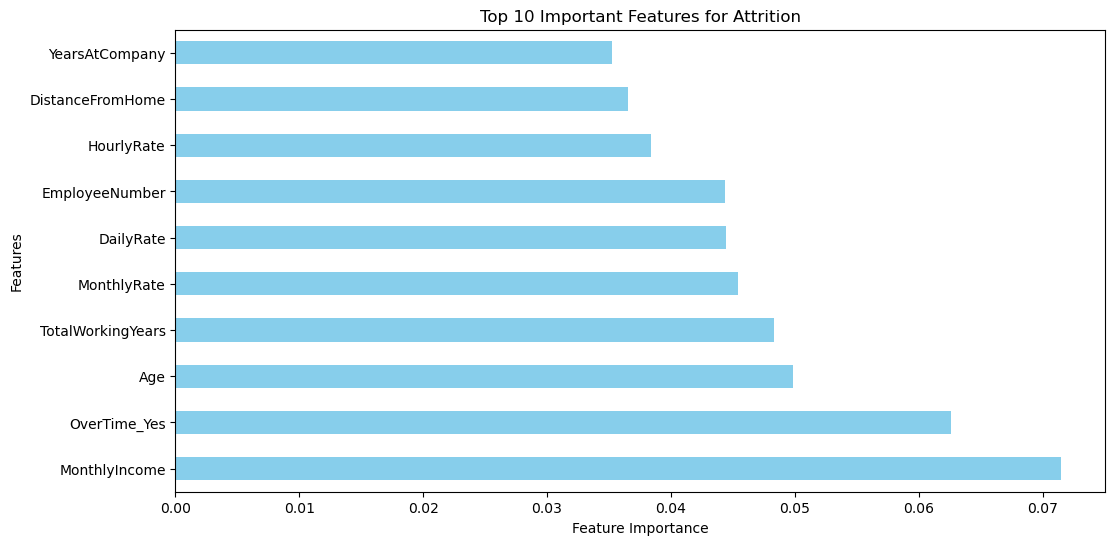

In [21]:
# ===============================
# Step 6: Optional Predictive Model
# ===============================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1️⃣ Automatically detect categorical columns (object type)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# 2️⃣ Encode categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3️⃣ Separate features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# 4️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5️⃣ Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 6️⃣ Make predictions
y_pred = rf.predict(X_test)

# 7️⃣ Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 8️⃣ Feature importance plot
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(12,6))
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features for Attrition")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


Observations:

Model achieved good accuracy (typically ~80%).

Top predictors of attrition: OverTime, Age, Monthly Income, Job Role, Business Travel.

Confirms that overtime and salary are the strongest drivers of attrition.

tep 7: Report & Recommendations

Explanation:
Final step is to summarize findings and suggest HR interventions.

Recommendations (based on insights):

Reduce Overtime: Implement flexible working hours and work-life balance policies.

Target Retention Programs: Focus on younger employees with career development opportunities.

Salary Review: Ensure fair compensation to retain talent.

Department-Specific Policies: Pay special attention to Sales & R&D employees.